<a href="https://colab.research.google.com/github/Shriansh16/NLP/blob/main/Detecting_Hate_Speech_and_Offensive_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/archive (24).zip'

Archive:  /content/archive (24).zip
replace labeled_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/labeled_data.csv')

In [5]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
df1=df[['class','tweet']]

In [10]:
df1.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df1.isnull().sum()

class    0
tweet    0
dtype: int64

In [12]:
df1.duplicated().sum()

0

<Axes: >

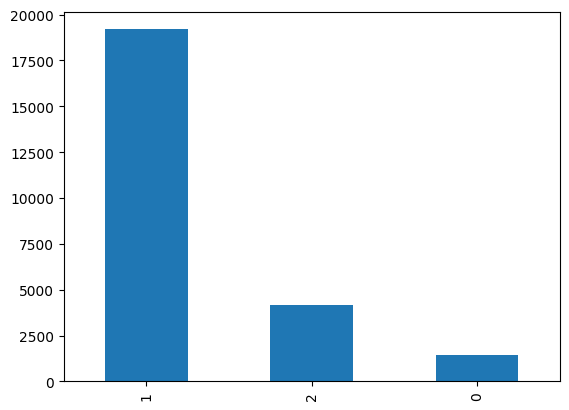

In [13]:
df['class'].value_counts().plot(kind='bar')

0 - Hate speech

1 - Offensive language

2 - None of the above

In [14]:
import nltk
from nltk.stem import WordNetLemmatizer

In [19]:
lemma=WordNetLemmatizer()

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
df1.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [17]:
import re

In [18]:
df['tweet'][0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [24]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
def preprocess_tweet(tweet):
    words = nltk.word_tokenize(tweet)
    words1 = [lemma.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words1)

In [25]:
df1['tweet']=df['tweet'].apply(preprocess_tweet)

<ipython-input-25-f1cc26f7aea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweet']=df['tweet'].apply(preprocess_tweet)


In [26]:
df1['tweet']

0        ! ! ! RT @ mayasolovely : As woman n't complai...
1        ! ! ! ! ! RT @ mleew17 : boy dat cold ... tyga...
2        ! ! ! ! ! ! ! RT @ UrKindOfBrand Dawg ! ! ! ! ...
3        ! ! ! ! ! ! ! ! ! RT @ C_G_Anderson : @ viva_b...
4        ! ! ! ! ! ! ! ! ! ! ! ! ! RT @ ShenikaRoberts ...
                               ...                        
24778    's muthaf * * * lie & # 8220 ; @ LifeAsKing : ...
24779    've gone broke wrong heart baby , drove rednec...
24780    young buck wan na eat ! ! .. dat nigguh like I...
24781                       youu got wild bitch tellin lie
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object